In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 16
batch_size_test = 16

train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=256, crop=224)

encoding_dim = 2048
lr = 0.00005
n_epochs = 1

Loaded image shape in tensor: torch.Size([16, 3, 224, 224])


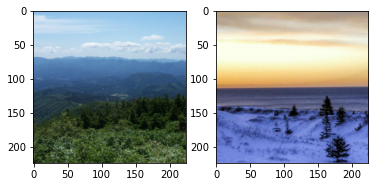

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))

print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = Res_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr)
#autoencoder.apply(init_weights)
#autoencoder = Autoencoder(224*224, encoding_dim)

Shape : torch.Size([16, 3, 224, 224])


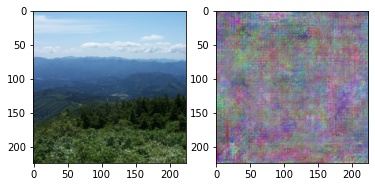

In [6]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)

In [7]:
print(get_n_params(autoencoder))

82137667


In [8]:
train_losses, val_losses = [], []

Epoch 1/20
----------


100%|█████████████████████████████████████████| 243/243 [00:21<00:00, 11.45it/s]


train loss 0.599982


  0%|                                                    | 0/27 [00:00<?, ?it/s]

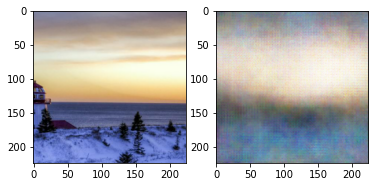

100%|███████████████████████████████████████████| 27/27 [00:04<00:00,  5.77it/s]


valid loss 0.575649

Epoch 2/20
----------


  9%|███▋                                      | 21/243 [00:05<00:53,  4.18it/s]


KeyboardInterrupt: 

NameError: name 't_l' is not defined

In [9]:
%time t_l, v_l = train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=20)
train_losses.extend(t_l); val_losses.extend(v_l)

In [ ]:
x = next(iter(test_loader))

In [ ]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)